<a href="https://colab.research.google.com/github/felipelarraguibel-art/Portafolio/blob/Etapa-1/Sm17_Examen_FelipeL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install wbgapi

In [2]:
from google.colab import drive
from datetime import datetime
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/UDP-CcsDatos2025-2/')
import my_func as fn



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Indicadores a consultar
indicadores_wb = {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}


In [4]:
# Descarga de datos
df_wb_raw = fn.descargar_en_chunks(indicadores_wb, años=2023, chunk_size=10)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS']
Descargando bloque 2: ['SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS', 'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS']
Descargando bloque 3: ['SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 4: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN']
Descargando bloque 5: ['GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS', 'EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE

In [5]:
import wbgapi as wb
import pandas as pd
import numpy as np
from math import ceil

# Seleccionar solamente paises usando código ISO
table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [6]:
#Seleccionar solamente paises.
df_wb_raw = df_wb_raw[df_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

In [7]:
import pandas as pd
df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])

In [8]:
df_wb_raw.head()

,country,Country,NY.GDP.MKTP.PP.KD,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
0,ZWE,Zimbabwe,Medium,1.677096,16340822.0,8559888.0,52.383460,7780934.0,47.616540,3.180794,...,NaN,NaN,65.013,62.775,60.226,7.5,77.0,NaN,NaN,38.4266
1,ZMB,Zambia,Medium,2.794068,20723965.0,10467717.0,50.510204,10256248.0,49.489796,3.753005,...,NaN,NaN,68.673,66.349,63.936,2.3,16.8,NaN,NaN,33.0000
2,PSE,West Bank and Gaza,Medium-Low,2.393265,5165775.0,2598445.0,50.301172,2567330.0,49.698828,2.694855,...,54.781748,33.968858,71.502,65.170,59.691,NaN,NaN,86.2802,86.9849,86.6377
3,VNM,Viet Nam,High,0.671429,100352192.0,51201223.0,51.021529,49150969.0,48.978471,2.209665,...,36.077468,29.637136,79.264,74.588,69.877,98.7,99.4,75.8894,80.3200,78.0800
4,VUT,Vanuatu,Low,2.324816,320409.0,158611.0,49.502667,161798.0,50.497333,2.374479,...,NaN,NaN,73.927,71.477,69.445,9.0,52.3,NaN,NaN,45.7313


# **Etapa 1**

**Revisión general del dataset**

Identificar el número de países, años y variables disponibles.

Número total de observaciones

Porcentaje de datos faltantes por variable: En caso que la variable cuente con menos de un 15% de datos NA se recomienda imputar. En caso contrario, eliminar variable.

Identificación de outliers relevantes

Otras observaciones relevante

In [10]:
# 1.
# Identificar el número de países
num_paises = df_wb_raw['Country'].nunique()

#  Identificar el número de años
# Basado en la descarga de datos previa (años=2023), sabemos que es un solo año.
num_años = 1

#  Identificar el número de variables (indicadores)
# Se excluyen las columnas 'country' (código ISO) y 'Country' (nombre del país)
num_variables = df_wb_raw.shape[1] - 2

print(f"Número de países únicos: {num_paises}")
print(f"Número de años cubiertos: {num_años} (datos del año 2023)")
print(f"Número de variables (indicadores): {num_variables}")


Número de países únicos: 198
Número de años cubiertos: 1 (datos del año 2023)
Número de variables (indicadores): 65


In [11]:
# 2. Número total de observaciones
num_total_observaciones = df_wb_raw.shape[0]
print(f"Número total de observaciones: {num_total_observaciones}")

Número total de observaciones: 198


In [12]:
# 3.
# Porcentaje de datos faltantes por variable
missing_data = df_wb_raw.isnull().sum()
total_rows = len(df_wb_raw)
missing_percentage = (missing_data / total_rows) * 100

print("\nPorcentaje de datos faltantes por variable:\n")
# Filtramos para mostrar solo las variables con datos faltantes
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_percentage)

# Variables a eliminar (>= 15% de datos faltantes)
variables_to_drop = missing_percentage[missing_percentage >= 15].index.tolist()

# Variables a imputar (< 15% de datos faltantes)
variables_to_impute = missing_percentage[missing_percentage < 15].index.tolist()

print(f"\nVariables recomendadas para ELIMINAR (>= 15% NA): {variables_to_drop}")
print(f"Variables recomendadas para IMPUTAR (< 15% NA): {variables_to_impute}")



Porcentaje de datos faltantes por variable:

SE.PRM.NENR.MA             100.000000
SE.PRM.NENR.FE             100.000000
SE.PRM.NENR                100.000000
GC.TAX.EXPT.ZS              83.333333
GC.TAX.EXPT.CN              83.333333
GC.DOD.TOTL.CN              82.828283
GC.DOD.TOTL.GD.ZS           82.828283
IT.NET.USER.FE.ZS           71.212121
IT.NET.USER.MA.ZS           71.212121
EG.ELC.LOSS.ZS              64.646465
EG.USE.ELEC.KH.PC           64.141414
SL.UEM.TOTL.MA.NE.ZS        46.969697
SL.UEM.TOTL.NE.ZS           46.969697
SL.UEM.TOTL.FE.NE.ZS        46.969697
SE.TER.ENRR.MA              38.383838
SE.TER.ENRR.FE              38.383838
SE.TER.ENRR                 37.878788
SE.SEC.ENRR.MA              32.323232
SE.SEC.ENRR.FE              31.818182
SE.SEC.ENRR                 30.303030
NE.EXP.GNFS.KD.ZG           20.202020
NE.EXP.GNFS.KN              20.202020
NE.CON.GOVT.KN              20.202020
NE.CON.PRVT.CD              18.181818
NE.CON.PRVT.CN              18.181818
NE.C


--- Identificación de Outliers (gráficos de caja) ---


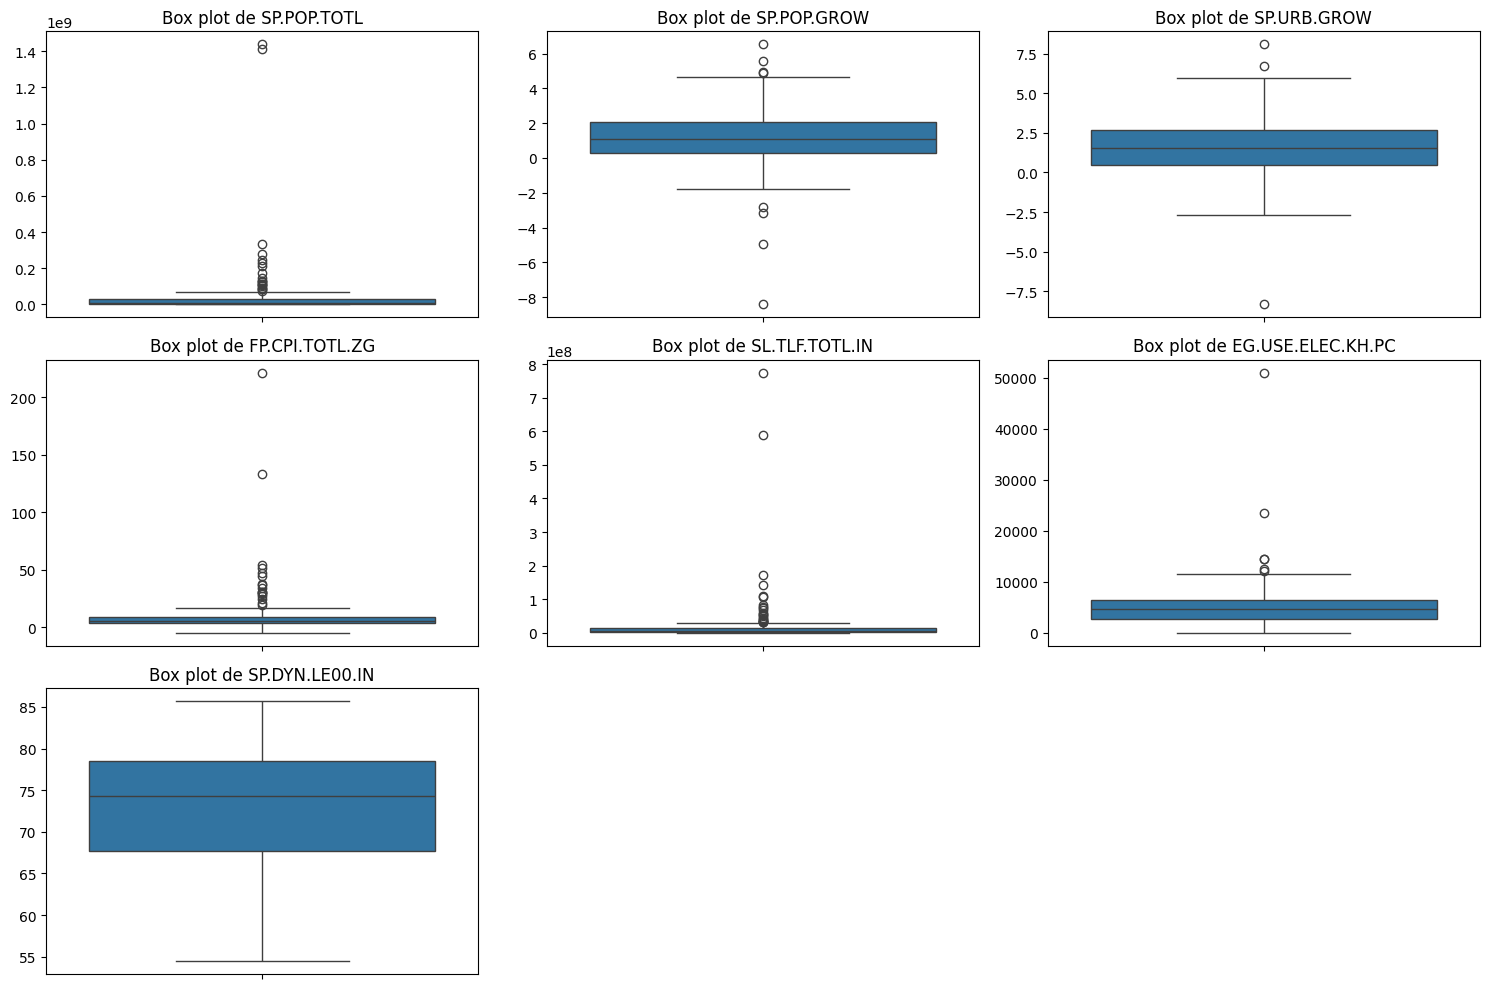


--- Otras Observaciones Relevantes ---

Basado en los gráficos de caja, busca valores que se extienden significativamente más allá de los 'bigotes'.
Estos puntos individuales fuera de los bigotes son posibles outliers. Considera su contexto antes de decidir cómo tratarlos.

También, considera si hay alguna característica general del dataset, como la distribución geográfica de los países, la concentración de datos en ciertos rangos, o cualquier otro patrón que no haya sido cubierto por los análisis anteriores.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Excluir columnas no numéricas y la variable objetivo discretizada
numeric_cols = df_wb_raw.select_dtypes(include=['number']).columns.tolist()

# Filtrar las columnas numéricas para evitar errores si alguna ya fue eliminada o cambiada de tipo
# También se puede excluir la columna 'NY.GDP.MKTP.PP.KD' si ya está discretizada y no es numérica.
# Aunque en este caso, .select_dtypes(include=['number']) ya la excluiría si es categórica.

print("\n--- Identificación de Outliers (gráficos de caja) ---")

# Seleccionar un subconjunto de variables numéricas para visualizar
# Para evitar generar demasiados gráficos, seleccionaremos algunas variables clave.
# Si quieres ver todas las numéricas, puedes iterar sobre `numeric_cols`.

# Ejemplo con algunas variables numéricas que no tienen 100% NA y pueden ser relevantes
selected_numerical_for_outliers = [
    'SP.POP.TOTL', 'SP.POP.GROW', 'SP.URB.GROW', 'FP.CPI.TOTL.ZG',
    'SL.TLF.TOTL.IN', 'EG.USE.ELEC.KH.PC', 'SP.DYN.LE00.IN'
]

# Asegurarse de que las columnas seleccionadas realmente existan en numeric_cols
selected_numerical_for_outliers = [col for col in selected_numerical_for_outliers if col in numeric_cols]

plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_numerical_for_outliers):
    plt.subplot(3, 3, i + 1)  # Ajusta el layout de los subplots según el número de variables
    sns.boxplot(y=df_wb_raw[col].dropna()) # Usa .dropna() para evitar errores con NaNs en boxplot
    plt.title(f'Box plot de {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

print("\n--- Otras Observaciones Relevantes ---")
print("\nBasado en los gráficos de caja, busca valores que se extienden significativamente más allá de los 'bigotes'.")
print("Estos puntos individuales fuera de los bigotes son posibles outliers. Considera su contexto antes de decidir cómo tratarlos.")
print("\nTambién, considera si hay alguna característica general del dataset, como la distribución geográfica de los países, la concentración de datos en ciertos rangos, o cualquier otro patrón que no haya sido cubierto por los análisis anteriores.")


**Indicaciones:**

Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

Mostrar la distribución del PIB (histograma o boxplot), ya que es la variable objetivo.

Mapa con la distribución del PIB

Discretizar la variable dependiente NY.GDP.MKTP.PP.KD de aceurdo con la siguiente indicación.

df_wb_raw['NY.GDP.MKTP.PP.KD'] = pd.qcut(df_wb_raw['NY.GDP.MKTP.PP.KD'], q=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])


In [16]:
# Generar una tabla de estadísticas descriptivas: media, mediana, desviación estándar, máximo, mínimo.

import pandas as pd

# Seleccionar solo las columnas numéricas para las estadísticas descriptivas
numeric_df = df_wb_raw.select_dtypes(include=['number'])

# Generar la tabla de estadísticas descriptivas: media, mediana (50%), desviación estándar, máximo, mínimo
desc_stats = numeric_df.describe().loc[['mean', '50%', 'std', 'max', 'min']]

print("\nTabla de Estadísticas Descriptivas:\n")
display(desc_stats)


Tabla de Estadísticas Descriptivas:



,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,SP.POP.TOTL.MA.ZS,SP.URB.GROW,SP.URB.TOTL,SP.URB.TOTL.IN.ZS,SL.TLF.TOTL.FE.ZS,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
mean,1.152752,3.999611e+07,1.987776e+07,49.973491,2.011836e+07,50.026509,1.729545,2.289674e+07,62.205392,41.898361,...,60.958578,45.456089,76.119303,73.476060,70.910354,62.271154,78.501099,87.190260,88.240505,72.290555
50%,1.112108,7.335048e+06,3.672054e+06,50.329281,3.560820e+06,49.670719,1.524572,4.463172e+06,63.622523,45.081945,...,63.036400,44.203554,77.486500,74.292890,70.666000,84.150000,97.600000,89.829000,90.538300,81.722100
std,1.576210,1.484957e+08,7.252840e+07,2.993389,7.598056e+07,2.993389,1.826024,8.019058e+07,22.722526,9.018596,...,35.784689,28.107669,7.221813,7.085527,7.104323,41.324522,32.394985,13.774667,12.542169,24.224349
max,6.527050,1.438070e+09,6.961863e+08,54.920880,7.418833e+08,71.516259,8.105580,9.244403e+08,100.000000,54.670843,...,171.113083,159.586578,88.090000,85.706000,84.206000,100.000000,100.000000,100.000000,100.000000,100.000000
min,-8.423008,9.816000e+03,4.795000e+03,28.483741,5.021000e+03,45.079120,-8.348151,6.283000e+03,15.058102,6.846247,...,4.663074,2.806122,54.743000,54.462000,53.195000,0.000000,0.100000,16.697100,19.497300,11.078400


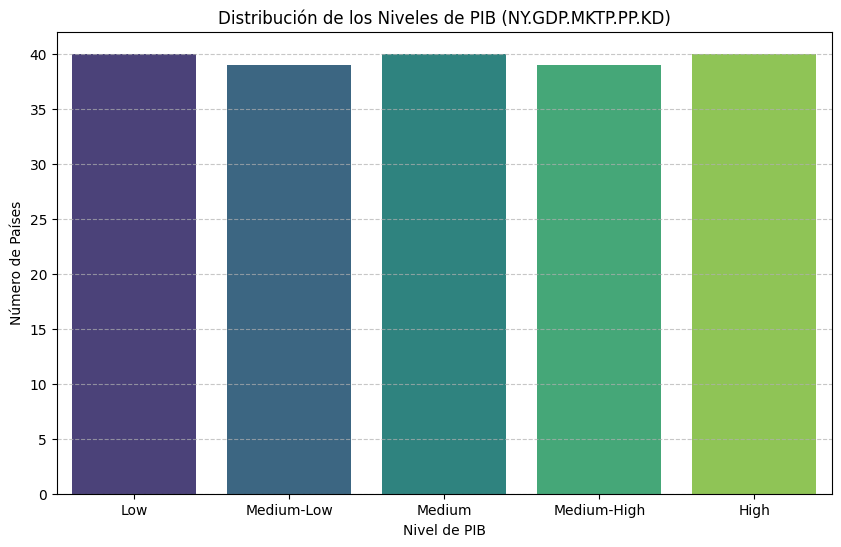

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mostrar la distribución del PIB (variable objetivo discretizada)
plt.figure(figsize=(10, 6))
sns.countplot(x=df_wb_raw['NY.GDP.MKTP.PP.KD'], hue=df_wb_raw['NY.GDP.MKTP.PP.KD'], order=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'], palette='viridis', legend=False)
plt.title('Distribución de los Niveles de PIB (NY.GDP.MKTP.PP.KD)')
plt.xlabel('Nivel de PIB')
plt.ylabel('Número de Países')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [20]:
import plotly.express as px

# Definir un mapa de colores discreto para las categorías de PIB
color_map_gdp = {
    'Low': 'red',
    'Medium-Low': 'orange',
    'Medium': 'yellow',
    'Medium-High': 'lightgreen',
    'High': 'green'
}

fig = px.choropleth(df_wb_raw,
                    locations="country", # Columna con códigos ISO de país
                    color="NY.GDP.MKTP.PP.KD", # Columna a usar para colorear el mapa
                    hover_name="Country", # Mostrar el nombre completo del país al pasar el ratón
                    color_discrete_map=color_map_gdp, # Mapa de colores personalizado
                    title="Distribución del Nivel de PIB por País (2023)",
                    projection="natural earth") # Tipo de proyección del mapa

fig.show()
